# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [42]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from pathlib import Path
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Straw
[nltk_data]     Hat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
# Create a newsapi client
from newsapi import NewsApiClient
load_dotenv()
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [44]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [45]:
# Fetch the Ethereum news articles
ethereum_headlines= newsapi.get_everything(
    q="Ethereum",
    language="en", 
    sort_by='relevancy',
)

In [46]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head(10)


,Compound,Positive,Negative,Neutral,Text
0,0.5859,0.124,0.000,0.876,Even if you arent paying attention to Bitcoin ...
1,0.0000,0.000,0.000,1.000,When Denis Rusinovich set up cryptocurrency mi...
2,0.3182,0.105,0.000,0.895,El Salvador introduced Bitcoin as a legal tend...
3,-0.4404,0.000,0.083,0.917,Were officially building an open Bitcoin minin...
4,-0.3182,0.045,0.084,0.871,Israeli national Tal Prihar pled guilty to rou...
5,0.0000,0.000,0.000,1.000,"In a new blog post the company said that 4,836..."
6,-0.7096,0.000,0.169,0.831,Netflix\r\n is making a docuseries about one o...
7,0.3612,0.068,0.000,0.932,"Bitcoin, the largest digital asset, extended i..."
8,-0.4404,0.000,0.083,0.917,Block founder Jack Dorsey has announced on Twi...
9,0.3818,0.073,0.000,0.927,Tesla Inc (TSLA.O) will accept the meme-based ...


In [47]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head(10)

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.000,1.000,"In a new blog post the company said that 4,836..."
1,0.0000,0.000,0.000,1.000,Hackers who made off with roughly $15 million ...
2,0.1779,0.052,0.000,0.948,"On some level, the new mayor is simply employi..."
3,0.0772,0.038,0.000,0.962,"Back in September\r\n, Robinhood announced pla..."
4,-0.2023,0.039,0.062,0.899,If people who buy cryptocurrencies intended on...
5,0.0000,0.000,0.000,1.000,This enables an L1 platform to bootstrap its n...
6,-0.1027,0.056,0.067,0.877,Trading platform Crypto.com lost about $34 mil...
7,0.0000,0.000,0.000,1.000,"The means-and-ends moralists, or non-doers, al..."
8,0.4019,0.085,0.000,0.915,Ethereum is a digital platform that runs on bl...
9,-0.0557,0.041,0.047,0.911,Crypto bros never tire of sharing their utopia...


In [48]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.073527,0.069430,0.047950,0.882590
std,0.428141,0.062734,0.064763,0.083741
min,-0.817600,0.000000,0.000000,0.662000
25%,-0.288875,0.000000,0.000000,0.831000
50%,0.064400,0.070000,0.000000,0.895000
75%,0.445000,0.112750,0.088000,0.937250
max,0.834100,0.234000,0.258000,1.000000


In [49]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.095105,0.053250,0.022100,0.924650
std,0.297967,0.054394,0.045603,0.074845
min,-0.680800,0.000000,0.000000,0.775000
25%,0.000000,0.000000,0.000000,0.889750
50%,0.000000,0.043500,0.000000,0.931500
75%,0.233900,0.090250,0.011750,1.000000
max,0.680800,0.185000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [50]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [51]:
# Instantiate the lemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))

In [52]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    
    regex = re.compile("[^a-zA-Z ]")
   
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    words = word_tokenize(re_clean)
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
    
    # Remove the stop words
   
    return lem

tokenizer(bitcoin_df.iloc[0]['Text'])

['even',
 'if',
 'you',
 'arent',
 'paying',
 'attention',
 'to',
 'bitcoin',
 'and',
 'other',
 'cryptocurrencies',
 'you',
 'might',
 'have',
 'noticed',
 'that',
 'their',
 'value',
 'plummeted',
 'last',
 'week',
 'with',
 'the',
 'total',
 'value',
 'of',
 'the',
 'market',
 'tumbling',
 'from',
 'a',
 'high',
 'of',
 'tr',
 'char']

In [53]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['Text'].apply(tokenizer)
bitcoin_df

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.5859,0.124,0.000,0.876,Even if you arent paying attention to Bitcoin ...,"[even, if, you, arent, paying, attention, to, ..."
1,0.0000,0.000,0.000,1.000,When Denis Rusinovich set up cryptocurrency mi...,"[when, denis, rusinovich, set, up, cryptocurre..."
2,0.3182,0.105,0.000,0.895,El Salvador introduced Bitcoin as a legal tend...,"[el, salvador, introduced, bitcoin, a, a, lega..."
3,-0.4404,0.000,0.083,0.917,Were officially building an open Bitcoin minin...,"[were, officially, building, an, open, bitcoin..."
4,-0.3182,0.045,0.084,0.871,Israeli national Tal Prihar pled guilty to rou...,"[israeli, national, tal, prihar, pled, guilty,..."
...,...,...,...,...,...,...
95,0.0516,0.061,0.056,0.882,Quantum computers would need to become around ...,"[quantum, computer, would, need, to, become, a..."
96,0.6124,0.147,0.000,0.853,US stock futures slipped Monday after the majo...,"[u, stock, future, slipped, monday, after, the..."
97,-0.0772,0.081,0.088,0.831,"Anna Moneymaker/GettyOn Sept. 4, 2017, accordi...","[anna, moneymakergettyon, sept, according, to,..."
98,0.4404,0.077,0.000,0.923,ProFootball Talk on NBC Sports\r\nThe Buccanee...,"[profootball, talk, on, nbc, sportsthe, buccan..."


In [54]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['Text'].apply(tokenizer)
ethereum_df

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.000,1.000,"In a new blog post the company said that 4,836...","[in, a, new, blog, post, the, company, said, t..."
1,0.0000,0.000,0.000,1.000,Hackers who made off with roughly $15 million ...,"[hacker, who, made, off, with, roughly, millio..."
2,0.1779,0.052,0.000,0.948,"On some level, the new mayor is simply employi...","[on, some, level, the, new, mayor, is, simply,..."
3,0.0772,0.038,0.000,0.962,"Back in September\r\n, Robinhood announced pla...","[back, in, september, robinhood, announced, pl..."
4,-0.2023,0.039,0.062,0.899,If people who buy cryptocurrencies intended on...,"[if, people, who, buy, cryptocurrencies, inten..."
5,0.0000,0.000,0.000,1.000,This enables an L1 platform to bootstrap its n...,"[this, enables, an, l, platform, to, bootstrap..."
6,-0.1027,0.056,0.067,0.877,Trading platform Crypto.com lost about $34 mil...,"[trading, platform, cryptocom, lost, about, mi..."
7,0.0000,0.000,0.000,1.000,"The means-and-ends moralists, or non-doers, al...","[the, meansandends, moralist, or, nondoers, al..."
8,0.4019,0.085,0.000,0.915,Ethereum is a digital platform that runs on bl...,"[ethereum, is, a, digital, platform, that, run..."
9,-0.0557,0.041,0.047,0.911,Crypto bros never tire of sharing their utopia...,"[crypto, bros, never, tire, of, sharing, their..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [55]:
from collections import Counter
from nltk import ngrams

In [56]:
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(bitcoin_df)
eth_tokens = get_token(ethereum_df)

In [57]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=2)))
    return words_count

In [58]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)
bigram_eth

{('in', 'a'): 2,
 ('a', 'new'): 3,
 ('new', 'blog'): 2,
 ('blog', 'post'): 3,
 ('post', 'the'): 1,
 ('the', 'company'): 4,
 ('company', 'said'): 2,
 ('said', 'that'): 1,
 ('that', 'eth'): 1,
 ('eth', 'and'): 1,
 ('and', 'bitcoin'): 1,
 ('bitcoin', 'were'): 1,
 ('were', 'takenillustration'): 1,
 ('takenillustration', 'by'): 1,
 ('by', 'alex'): 1,
 ('alex', 'castro'): 1,
 ('castro', 'the'): 1,
 ('the', 'vergein'): 1,
 ('vergein', 'a'): 1,
 ('a', 'blog'): 1,
 ('post', 'published'): 1,
 ('published', 'in'): 2,
 ('in', 'the'): 1,
 ('the', 'early'): 1,
 ('early', 'hour'): 1,
 ('hour', 'of'): 1,
 ('of', 'thursday'): 1,
 ('thursday', 'morning'): 1,
 ('morning', 'cryptocurrency'): 1,
 ('cryptocurrency', 'char'): 1,
 ('char', 'hacker'): 1,
 ('hacker', 'who'): 1,
 ('who', 'made'): 1,
 ('made', 'off'): 3,
 ('off', 'with'): 3,
 ('with', 'roughly'): 1,
 ('roughly', 'million'): 1,
 ('million', 'in'): 4,
 ('in', 'ethereum'): 1,
 ('ethereum', 'from'): 1,
 ('from', 'cryptocom'): 1,
 ('cryptocom', 'are')

In [59]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('the', 142),
 ('a', 117),
 ('char', 99),
 ('to', 94),
 ('of', 75),
 ('bitcoin', 65),
 ('and', 59),
 ('in', 59),
 ('it', 49),
 ('on', 47)]

In [61]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('the', 36),
 ('a', 22),
 ('char', 19),
 ('to', 18),
 ('in', 17),
 ('and', 14),
 ('of', 14),
 ('that', 9),
 ('on', 9),
 ('it', 9)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

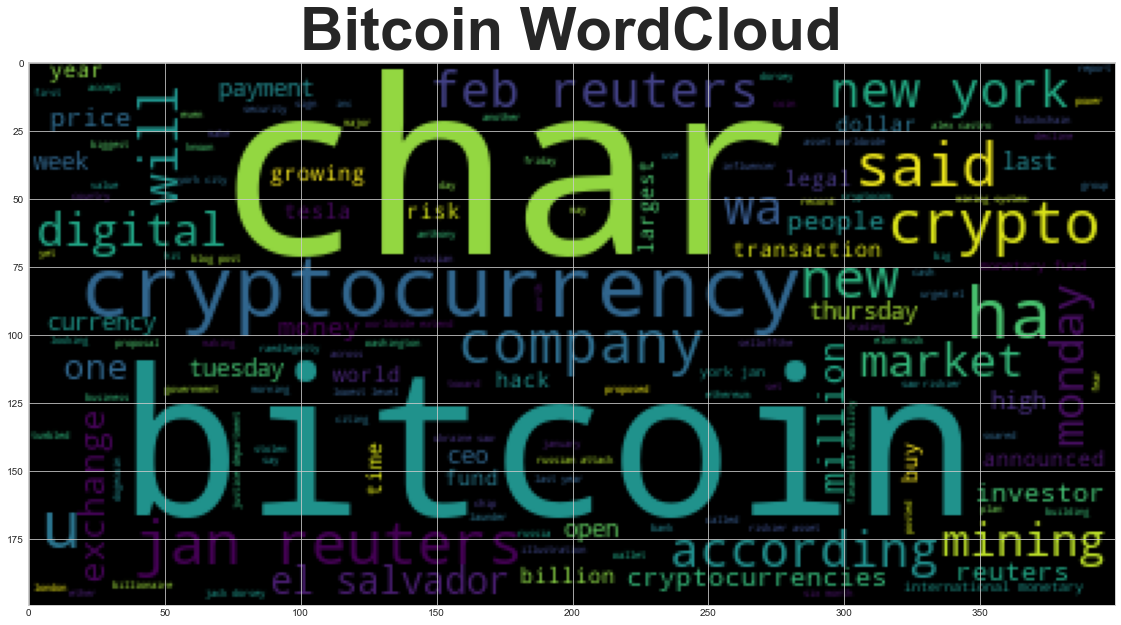

In [63]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin WordCloud", fontsize = 60, fontweight = 'bold')
plt.imshow(wc)

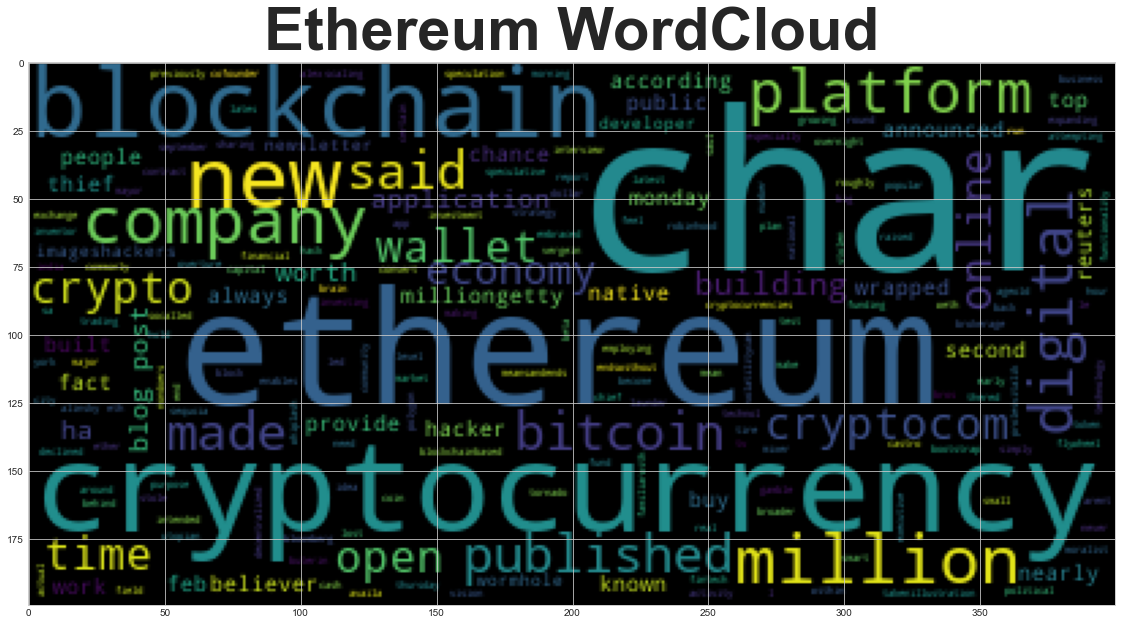

In [64]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.title("Ethereum WordCloud", fontsize = 60, fontweight = 'bold')
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [65]:
import spacy
from spacy import displacy

In [66]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [67]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [68]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(bitcoin_df['Text'])
btc_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars] Were officially building an open Bitcoin mining system\r\nPhoto by Joe Raedle/Getty Images\r\nBlock, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Al

In [69]:
# Run the NER processor on all of the text
doc = nlp(btc_text)


# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"

In [70]:
# Render the visualization
displacy.render(doc, style='ent')

In [71]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

last week DATE
3 MONEY
Denis Rusinovich PERSON
Maveric Group ORG
Kazakhstan GPE
2017 DATE
China GPE
Russia GPE
El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Bitcoin PERSON
Joe Raedle/Getty Images PERSON
Square FAC
Bitcoin PERSON
Israeli NORP
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Netflix ORG
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
the "Giga Texas ORG
Elon Musk PERSON
Friday DATE
Fintech ORG
New York City GPE
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The 

---

### Ethereum NER

In [72]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(ethereum_df['Text'])
eth_text

'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] Hackers who made off with roughly $15 million in ethereum from Crypto.com are attempting to launder the funds through a so-called ethereum mixer, known as Tornado Cash, according to a new report from… [+3891 chars] On some level, the new mayor is simply employing an age-old political strategy: making overtures to the business community. Fintech is a growing field in New York City, and blockchain-based companies… [+1562 chars] Back in September\r\n, Robinhood announced plans to test a cryptocurrency wallet within its app. At the time, the company said it would open the beta to a small number of people before expanding availa… [+1069 chars] If people who buy cryptocurrencies intended only to hold on to them as speculative investments, there\'d be no real need for crypto w

In [73]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "ETHEREUM NER"

In [74]:
# Render the visualization
displacy.render(doc, style='ent')

In [75]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
roughly $15 million MONEY
Crypto.com ORG
Tornado Cash PERSON
Fintech ORG
New York City GPE
September DATE
Robinhood ORG
Crypto.com ORG
about $34 million MONEY
Monday DATE
Saul Alinsky Ethereum ORG
Ethereum ORG
Vitalik Buterin PERSON
Ethereum ORG
Feb 7 DATE
Reuters ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
OPEN ORG
second ORDINAL
OPEN ORG
second ORDINAL
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Feb 4 DATE
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
2202 DATE
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
TIME ORG
weekly DATE
Vita ORG


---